In [1]:

import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
train_filter = ((y_train == 0) | (y_train == 8))
x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]

# Filter the test data
test_filter = ((y_test == 0) | (y_test == 8))
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]


In [35]:
# Filter the test data
test_filter_3 = ((y_test == 3) )
x_test_filtered = x_test[test_filter_3]
y_test_filtered = y_test[test_filter_3]


In [32]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Flatten the images
x_train_flat = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Apply PCA
pca = PCA(n_components=50)  # Keep 95% of the variance
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print(f"Original shape: {x_train_flat.shape}")
print(f"PCA shape: {x_train_pca.shape}")


Original shape: (11774, 784)
PCA shape: (11774, 50)


In [19]:


print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Principal components: {pca.components_}")


Explained variance ratio: [0.0998542  0.07050103 0.03754132 0.0313116  0.02794747 0.02297792
 0.01971231 0.0173417  0.01635143 0.01535631 0.01374362 0.01234712
 0.01120611 0.01069342 0.01011191 0.00930711 0.00913722 0.00874382
 0.00850385 0.00814024 0.00806054 0.00791018 0.00769568 0.00740925
 0.00715992 0.00703317 0.00692521 0.00663554 0.00653382 0.00643809
 0.00629708 0.00620151 0.00612835 0.00598619 0.00593592 0.00585015
 0.00575907 0.00567608 0.00550307 0.00539305 0.00532901 0.00514846
 0.00506546 0.00502096 0.00497731 0.0049428  0.00492006 0.00483957
 0.00470322 0.00465677]
Principal components: [[-4.14171536e-17  1.52524905e-20  4.37528553e-21 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.97915926e-17 -1.47945895e-20  4.65728042e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.33726653e-17  5.76579372e-17  6.33745203e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.01481544e-17  5.23116441e-17 -1.06962109e-17 ...  0.00000000e+00
  

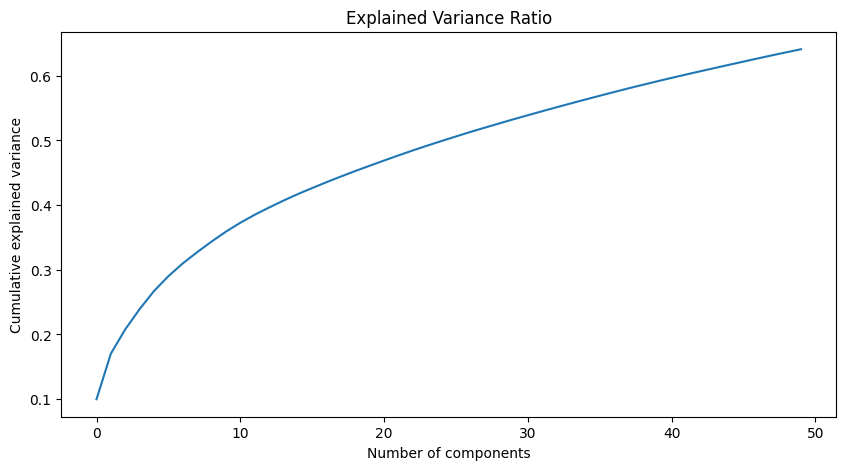

In [20]:

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance Ratio")
plt.show()


In [21]:

# Calculate the mean of the original and PCA-reduced data
original_mean = np.mean(x_train_flat, axis=0)
pca_mean = np.mean(x_train_pca, axis=0)

# Calculate the variance of the original and PCA-reduced data
original_variance = np.var(x_train_flat, axis=0)
pca_variance = np.var(x_train_pca, axis=0)

# Compare the mean and variance
print(f"Original data mean: {original_mean[:10]}")
print(f"PCA data mean: {pca_mean[:10]}")
print(f"Original data variance: {original_variance[:10]}")
print(f"PCA data variance: {pca_variance[:10]}")

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio[:10]}")
print(f"Total explained variance: {np.sum(explained_variance_ratio)}")


Original data mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PCA data mean: [ 2.24224693e-15 -2.40262295e-16  1.65973345e-15  2.70768441e-15
 -1.04772465e-15  1.20621479e-15  2.86172856e-15 -2.00590728e-15
 -2.72582666e-15 -1.30522398e-15]
Original data variance: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PCA data variance: [60.61149804 42.79412799 22.78757861 19.00614095 16.96411327 13.94759704
 11.96537299 10.5264091   9.92531544  9.32128296]
Explained variance ratio: [0.0998542  0.07050103 0.03754132 0.0313116  0.02794747 0.02297792
 0.01971231 0.0173417  0.01635143 0.01535631]
Total explained variance: 0.6409651863062527


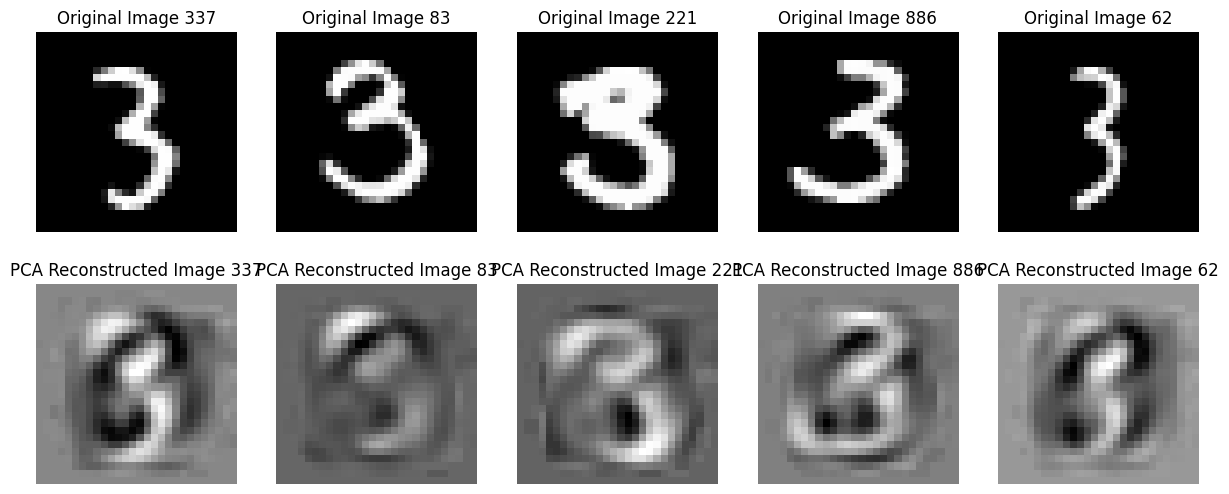

In [36]:
import matplotlib.pyplot as plt

# Select a few random images
indices = np.random.choice(x_test_filtered.shape[0], 5, replace=False)

x_test_filtered_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)
x_test_filtered_scaled = scaler.transform(x_test_filtered_flat)
x_test_filtered_pca = pca.transform(x_test_filtered_scaled)

# Plot the original and PCA-reduced images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
  axes[0, i].imshow(x_test_filtered[idx], cmap='gray')
  axes[0, i].set_title(f"Original Image {idx}")
  axes[0, i].axis('off')
  # Reconstruct the image from PCA
  reconstructed_image = pca.inverse_transform(x_test_filtered_pca[idx])
  reconstructed_image = reconstructed_image.reshape(28, 28)
  axes[1, i].imshow(reconstructed_image, cmap='gray')
  axes[1, i].set_title(f"PCA Reconstructed Image {idx}")
  axes[1, i].axis('off')

plt.show()


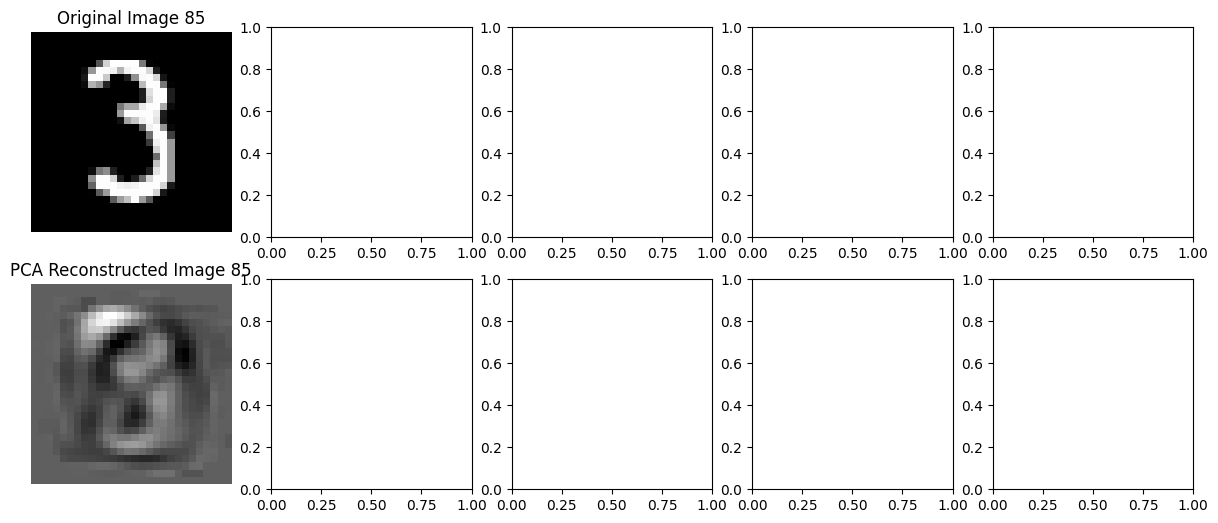

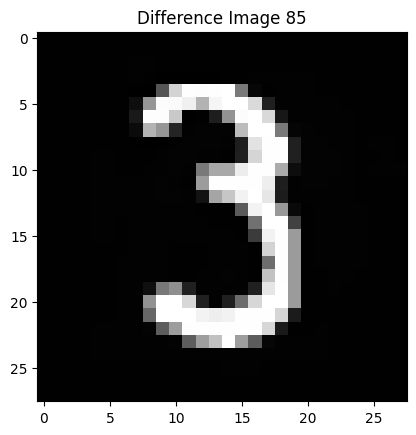

Principal components for image 85: [-3.36886958  5.51087146 -3.7963749  -0.21301817  8.22254058 -0.19373099
 -2.74389245 -5.10259059 -5.62957804 -3.66198464 -0.64761581 -3.04313495
  6.37303256 -2.6334925   2.62161156  2.60404052  2.92515999 -2.34025989
 -0.77584991  1.62024667 -1.76339858  2.423232   -0.00989084 -1.16094931
  2.96307091  2.85156947 -2.1863053  -0.17983814  0.96645793 -0.67361247
  0.05612623  1.85176876  1.65630183  0.06288873  0.04383233  0.77452706
  1.04230719  1.22069349 -0.22107544 -0.14423277  1.62462296  2.2671258
 -0.09570989  0.78420856 -0.12611606  0.45345646  0.15928715 -1.49710352
  0.79116408 -0.82138391]


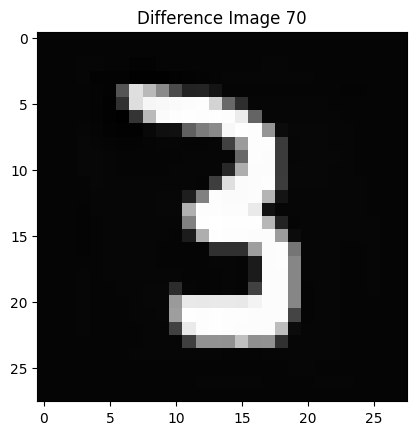

Principal components for image 70: [-6.09585769e+00  7.80276518e+00 -1.91952997e-01  3.03958789e+00
  7.69626425e+00 -9.31314273e-01 -1.78847274e+00 -7.04212167e+00
 -5.72151644e+00 -2.82353716e+00  3.84506065e+00 -6.64479604e+00
  1.63193434e+01 -7.29765605e+00 -9.39436096e-01  1.30544408e+00
  4.44628852e+00 -2.01968460e+00 -1.40664859e+00  3.98668295e+00
  1.59960204e-01  5.90186473e+00 -1.52101687e+00  5.89612298e+00
 -7.58759486e+00  2.11923957e-01  5.29362811e+00  1.80966003e+00
 -5.83062808e+00  4.97440515e-01  1.35231108e+00 -2.99148108e+00
  1.21958560e-02  1.10209371e+00 -1.13147295e+00  1.47861797e+00
  5.92304000e+00  5.48492559e+00 -3.43168203e-02  9.82276262e-01
  4.58998548e+00  1.40402388e+00  6.15488267e-01 -3.48116859e+00
 -2.02758831e-01 -1.82512586e+00  3.24404458e-01 -1.46386452e-01
  3.46525046e+00 -2.80778762e+00]


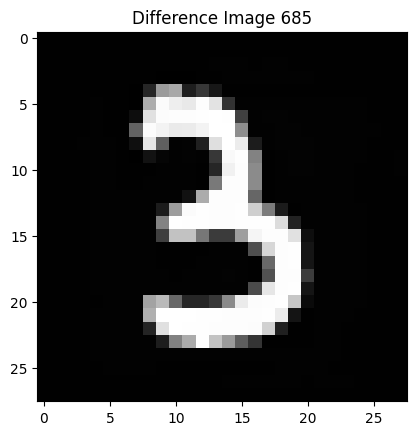

Principal components for image 685: [-4.46650157  5.4590655  -2.22469295  1.70812185  5.80475771  0.69451078
 -0.57850356 -5.24354098 -5.991596   -2.94203607  1.61765567 -3.18413398
  3.84049953 -5.04971953  3.07552816  1.51525983  3.06667139 -2.79152226
 -0.46021035  1.33223252 -1.35178894  4.7332184   0.26783444 -0.24483055
 -1.0660715   0.35212051 -1.64742834 -0.27835525 -0.60519438 -0.89035998
  0.21633737  1.05689843  1.60396628 -0.70614234 -1.02972146  0.37972777
 -0.04129691 -0.35716421  1.14155084 -2.21766066  0.5493093   0.68820907
  0.18362071 -1.29519466  1.3566136   0.69669306 -0.26224287 -1.09712524
  2.78940999  0.12011475]


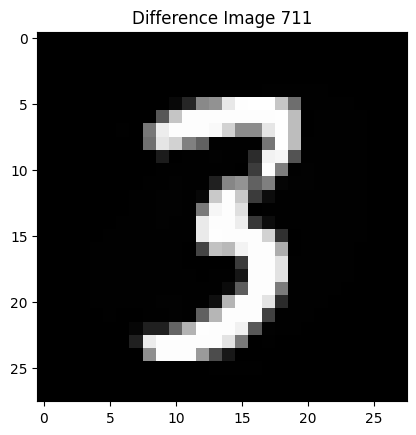

Principal components for image 711: [-7.50615846  2.16680294 -0.6648668  -4.24659161 -0.31418204  0.4245408
  0.87378034 -4.80039812  1.53115962 -1.24196956  0.49166386  0.64597788
  0.96823289 -1.55600919  4.63835574  3.55291911  3.38487807 -2.79677197
  0.90723071  2.06119934 -1.96468058 -1.60969803  0.80037677 -1.84486164
  0.19099387 -0.71504759  0.86939989  1.13594255 -0.50316703 -2.79801751
  0.84041117 -1.23316072  0.13697211 -0.95828417  0.40395648 -0.52806583
  1.75404685  0.16966259  1.15968739 -0.77345802  2.93078296 -0.78695843
  0.98838132  1.82206225 -0.81360448  0.39167934  0.55034047  0.37606331
 -0.63969094  1.07493894]


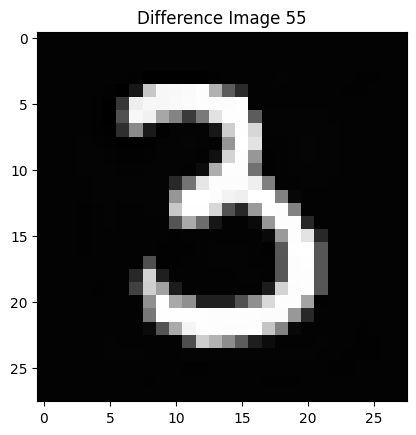

Principal components for image 55: [-1.33237782  7.24878922 -2.83517968  3.83544287  9.91508829  4.03217082
 -2.63194463 -5.07648044 -7.07395874 -3.2111414   1.90777087 -8.8423503
 15.03424148 -7.11375846 -1.38367598  1.25419239  0.89322507 -0.89116137
 -1.66072585  1.97803304 -0.96608906  7.43153926 -1.2500366   3.76040659
 -3.53716579  1.89504946  0.45538199  0.32094951 -1.99080448  0.58070489
  0.96133818  0.16459904  3.0034942   0.75887586 -0.72498688 -1.56725843
  1.97924231  2.61320029 -0.74887745 -0.15813675  0.95866057  3.04437548
 -0.59766284 -1.63605081  0.24943315  0.82102127 -0.66764122  0.78924383
  3.77715714 -1.7382701 ]


In [37]:
import matplotlib.pyplot as plt
import numpy as np
# Select a few random images
indices = np.random.choice(x_test_filtered.shape[0], 5, replace=False)

# ... (rest of the code from the preceding code)

# Plot the original and PCA-reduced images with principal components
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
  axes[0, i].imshow(x_test_filtered[idx], cmap='gray')
  axes[0, i].set_title(f"Original Image {idx}")
  axes[0, i].axis('off')

  # Reconstruct the image from PCA
  reconstructed_image = pca.inverse_transform(x_test_filtered_pca[idx])
  reconstructed_image = reconstructed_image.reshape(28, 28)
  axes[1, i].imshow(reconstructed_image, cmap='gray')
  axes[1, i].set_title(f"PCA Reconstructed Image {idx}")
  axes[1, i].axis('off')

  # Calculate the difference between original and reconstructed images
  diff = x_test_filtered[idx] - reconstructed_image

  # Display the difference image
  fig, ax = plt.subplots()
  ax.imshow(diff, cmap='gray')
  ax.set_title(f"Difference Image {idx}")
  plt.show()

  # Calculate the contribution of each principal component
  components = x_test_filtered_pca[idx]

  # Print the contribution of each principal component
  print(f"Principal components for image {idx}: {components}")


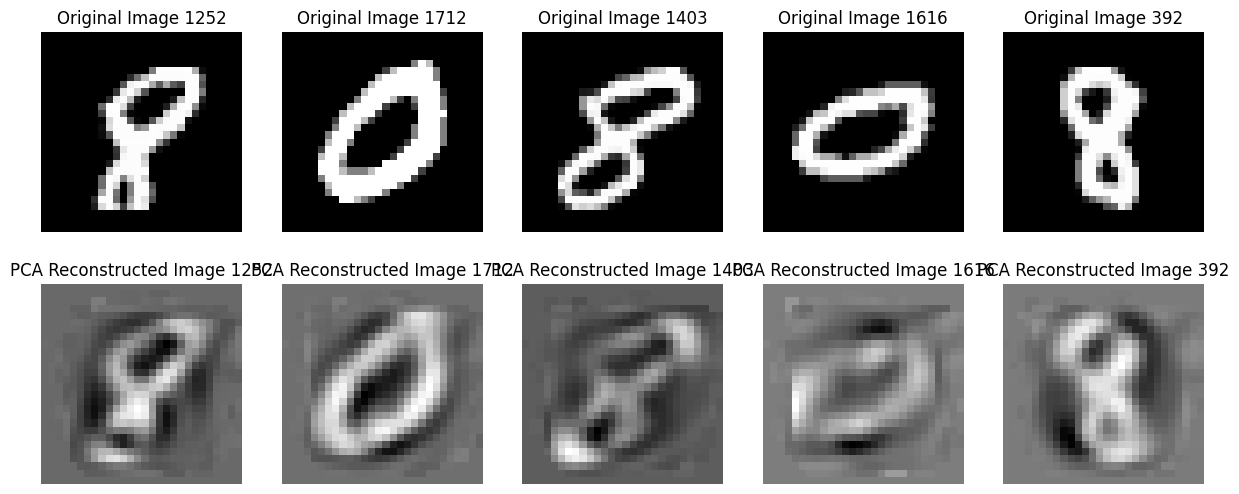

In [33]:
import matplotlib.pyplot as plt

# Select a few random images
indices = np.random.choice(x_test_filtered.shape[0], 5, replace=False)

# Plot the original and PCA-reduced images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
  axes[0, i].imshow(x_test_filtered[idx], cmap='gray')
  axes[0, i].set_title(f"Original Image {idx}")
  axes[0, i].axis('off')

  # Reconstruct the image from PCA
  reconstructed_image = pca.inverse_transform(x_test_pca[idx])
  reconstructed_image = reconstructed_image.reshape(28, 28)
  axes[1, i].imshow(reconstructed_image, cmap='gray')
  axes[1, i].set_title(f"PCA Reconstructed Image {idx}")
  axes[1, i].axis('off')

plt.show()